<a href="https://colab.research.google.com/github/dilaraadem/MachineLearning/blob/master/Copy9_of_CS412_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 412 Project - 2
* Dilara Ademoğlu - 20620
* Sena Necla Çetin -  21120
* Berk Yağlıoğlu - 19176
* Ömer Serhat Dai - 20985



# **We want to classify**
Classify a given credit applicant as -1 (will pay) or +1 (will not pay), based on their application
data such as their debt, salary... The target label is called Charged_Off and is -1 for good applicants
who pay their debts, and +1 for bad applicants who don’t.

# Reading the data from the files
First we read the data for training from the csv files.

In [0]:
import pandas as pd
import numpy as np

In [0]:
data = pd.read_csv('TrainPortion_Data.csv') #change to drive link if needed
label = pd.read_csv('TrainPortion_Label_.csv')
print("Data shape: ", data.shape)

Data shape:  (537870, 45)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Show data
Showing the data and checking the attributes and values in the data by using .info() function.

In [0]:
data.head(5)

,id,loan_amnt,term,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,desc,...,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mort_acc,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,168588,10000.0,36 months,308.73,QA Analyst,3 years,RENT,51000.0,Not Verified,NaN,...,6.0,4054.0,0.0,0.0,0.0,0.0,66394.0,40537.0,21400.0,39894.0
1,897426,20000.0,60 months,489.45,Sales Manager,3 years,MORTGAGE,90000.0,Source Verified,NaN,...,6.0,20263.0,0.0,0.0,1.0,0.0,370890.0,111757.0,20800.0,119086.0
2,855123,30000.0,36 months,1032.49,VP of Marketing,3 years,OWN,90980.0,Verified,NaN,...,0.0,1223.0,0.0,0.0,0.0,0.0,31800.0,7340.0,25800.0,0.0
3,806869,21000.0,60 months,503.02,IT Analyst,8 years,MORTGAGE,124000.0,Not Verified,NaN,...,4.0,42401.0,0.0,0.0,7.0,0.0,281786.0,47519.0,23500.0,33836.0
4,477407,12775.0,36 months,450.97,Ass manager,< 1 year,RENT,35500.0,Source Verified,NaN,...,2.0,1162.0,0.0,0.0,0.0,0.0,21754.0,5809.0,4700.0,10054.0


In [0]:
# check the types of data columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537870 entries, 0 to 537869
Data columns (total 45 columns):
id                            537870 non-null int64
loan_amnt                     537870 non-null float64
term                          537870 non-null object
installment                   537870 non-null float64
emp_title                     505820 non-null object
emp_length                    505957 non-null object
home_ownership                537870 non-null object
annual_inc                    537870 non-null float64
verification_status           537870 non-null object
desc                          55 non-null object
purpose                       537870 non-null object
title                         526025 non-null object
zip_code                      537870 non-null object
addr_state                    537870 non-null object
dti                           537843 non-null float64
delinq_2yrs                   537870 non-null float64
earliest_cr_line              537870 non-

# About Data
We have looked into the data and we observed that there are a lot of missing attributes and categorical features, which might lead to errors. So we edited the data.

##Total 13 "object" types
* emp_title => Make binary
* emp_length => Create 4 binary attributes, drop emp_length
* desc => drop it **(DROPPED)**
* title => Drop it **(DROPPED)**
* term => Make binary
* home_ownership => Create 3 binary attributes, do not include attribute for "ANY", drop home_ownership
* verification_status => Create 2 binary attributes, do not include attribute for "Not Verified", drop verification_status
* purpose => Create 11 binary attributes, do not include attribute for "other", drop purpose 
* zip_code => Drop it **(DROPPED)**
* addr_state => Drop it **(DROPPED)**
* earliest_cr_line => Get the last 4 digit as the year, create 3 binary attributes, drop earliest_cr_line 
* initial_list_status => Make binary
* application_type => Make binary

Drop attributes "id", "title", "desc", "zip_code", "addr_state".

##Total 11 missing attributes
* annual_inc_joint and dti_joint have been replaced with dummy variables.
* Rest of the list have been normalized:
> * dti
> * inc_last_6mths
> * total_bal_il
> * il_util
> * max_bal_bc
> * all_util 
> * inq_fi
> * total_cu_tl 
> * inq_last_12m

While testing the data, we realized that attribute "earliest_cr_line" is string type in csv file, but it is converted as datetime type from excel file. This led to error while converting it to a processable format. So we had to put an if condition to check if its string or not. It worked with given test data.


# Editing
We have defined 2 functions, one to edit the data to do the preprocessing and other to normalize the data in the columns.
The editData function takes the data read from csv and it applies preprocessing to all the attributes. 
* **The columns that have dropped:** id, title, desc, zip_code, addr_state
* **The columns that have been binarized:** emp_title, term, initial_list_status, application_type,
*  **The columns that have replaced with dummy attributes:** emp_length, home_ownership, verification_status, purpose, earliest_cr_line
* **The columns that have normalized:** loan_amnt, installment, annual_inc, delinq_2yrs, open_acc, pub_rec, total_acc, acc_now_delinq, tot_cur_bal, acc_open_past_24mths, avg_cur_bal, chargeoff_within_12_mths, delinq_amnt, mort_acc, pub_rec_bankruptcies, tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit, dti, inc_last_6mths,  annual_inc_joint, dti_joint, total_bal_il, il_util, max_bal_bc, all_util, inq_fi, total_cu_tl, inq_last_12m

For normalizing we defined a function that calculates the max value and min value of the chosen column in training data, then if the max value in the chosen part of the data is bigger than the current max, it replaces the new max data as 1 and does scaling according to that.

While creating dummy variables we calculated the mean and standard deviations of the attributes and divided the dummys accordingly.

In [0]:
def normalize(data2, column): #function for normalizing the data in the column
  maxValue = data[column].max()
  minValue = data[column].min()
  data2[column] = np.where(data2[column] >= maxValue, 1, np.where(data2[column] <= minValue, 0, (data2[column]-minValue)/(maxValue-minValue)))

def editData(data):
  #ID
  # column size is decreased by 1
  data.drop(['id'], axis=1, inplace=True)

  # ---------------------------------------------------------------
  # OBJECT & MISSING ATT

  #EMPLOYEE_TITLE --- DONE
  # make 0 or 1 
  data["emp_title"]=np.where(data["emp_title"]=="", 0, 1)

  #EMPLOYMENT LENGHT --- DONE
  # create dummy attributes
  # column size is increased by 3 in total
  data['emp_length_<1'] = np.where(data["emp_length"]=="< 1 year", 1, 0)
  data['emp_length_<=3'] = np.where(np.logical_or(np.logical_or(data["emp_length"]=="1 year", data["emp_length"]=="2 years"), data["emp_length"]=="3 years"), 1, 0)
  data['emp_length_<=9'] = np.where(np.logical_or(np.logical_or(np.logical_or(np.logical_or(np.logical_or(data["emp_length"]=="4 years", data["emp_length"]=="5 years"), data["emp_length"]=="6 years"), data["emp_length"]=="7 years"), data["emp_length"]=="8 years"), data["emp_length"]=="9 years"), 1, 0)
  data['emp_length_>=10'] = np.where(data["emp_length"]=="10+ years", 1, 0)
  # drop emp_length
  data.drop(['emp_length'], axis=1, inplace=True)


  #DESCRIPTION --- DONE
  # If no desc 0, if desc 1.
  # data["desc"]=np.where(data["desc"].isna(), 0, 1)
  data.drop(['desc'], axis=1, inplace =True)

  #TITLE --- DONE
  # column size is decreased by 1
  data.drop(['title'], axis=1, inplace=True)

  # ---------------------------------------------------------------
  # OBJECT

  #TERM --- DONE
  # convert "term" values to integers 36 and 60
  data["term"] = np.where(data["term"] == " 36 months", 0, 1) #HELL YEAH
  #36 60 yerine 0 or 1 daha accurate olabilir.

  #HOME OWNERSHIPS --- DONE
  # create dummy attributes
  # do not include column for "ANY"
  # column size is increased by 2 in total
  data["HO_RENT"] = np.where(data["home_ownership"] == "RENT", 1, 0)
  data["HO_MORT"] = np.where(data["home_ownership"] == "MORTGAGE", 1, 0)
  data["HO_OWN"] = np.where(data["home_ownership"] == "OWN", 1, 0)
  # drop home_ownership
  data.drop(['home_ownership'], axis=1, inplace=True)

  #VERIFICATION STATUS --- DONE
  # create dummy attributes
  # do not include column for "Not Verified"
  # column size is increased by 1 in total
  data["VS_source_verified"] = np.where(data["verification_status"]=="Source Verified", 1, 0)
  data["VS_verified"] = np.where(data["verification_status"]=="Verified", 1, 0)
  # drop verification_status
  data.drop(['verification_status'], axis=1, inplace=True)

  #PURPOSE --- DONE
  # create dummy attributes
  # do not include column for "other"
  # column size is increased by 10 in total
  data["purpose_debt_consolidation"] = np.where(data["purpose"]=="debt_consolidation", 1, 0)
  data["purpose_medical"] = np.where(data["purpose"]=="medical", 1, 0)
  data["purpose_moving"] = np.where(data["purpose"]=="moving", 1, 0)
  data["purpose_car"] = np.where(data["purpose"]=="car", 1, 0)
  data["purpose_house"] = np.where(data["purpose"]=="house", 1, 0)
  data["purpose_vacation"] = np.where(data["purpose"]=="vacation", 1, 0)
  data["purpose_renewable_energy"] = np.where(data["purpose"]=="renewable_energy", 1, 0)
  data["purpose_small_business"] = np.where(data["purpose"]=="small_business", 1, 0)
  data["purpose_major_purchase"] = np.where(data["purpose"]=="major_purchase", 1, 0)
  data["purpose_home_improvement"] = np.where(data["purpose"]=="home_improvement", 1, 0)
  data["purpose_credit_card"] = np.where(data["purpose"]=="credit_card", 1, 0)
  # drop purpose
  data.drop(['purpose'], axis=1, inplace=True)

  #ZIP CODE --- DONE
  # column size is decreased by 1
  data.drop(['zip_code'], axis=1, inplace=True)

  #ADRESS STATE --- DONE
  # column size is decreased by 1
  data.drop(['addr_state'], axis=1, inplace=True)  

  #INITIAL LIST --- DONE
  # If w = 1, f = 0
  data["initial_list_status"]=np.where(data["initial_list_status"]=="w", 1, 0)

  #APPLICATION TYPE --- DONE
  # If Individual 1, if Joint 0
  data["application_type"]=np.where(data["application_type"]=="Individual", 1, 0)

  
  #EARLIEST CREDIT LINE --- DONE
  # mean = 1999, std = 7.5
  # column size is increased by 2 in total
  if(type(data.at[1,'earliest_cr_line']) is str):
    data["earliest_cr_line"] = data["earliest_cr_line"].astype(str).str[4:] #if len is 8 string type
  else:
    data["earliest_cr_line"] = data["earliest_cr_line"].astype(str).str[:4] #if len is 10 is datetime type
  data["earliest_cr_line"] = data["earliest_cr_line"].astype('int')
  data["cr_line_>=1990"] = np.where(np.logical_and(data["earliest_cr_line"]>=1990, data["earliest_cr_line"]<2000), 1, 0)
  data["cr_line_>=2000"] = np.where(np.logical_and(data["earliest_cr_line"]>=2000, data["earliest_cr_line"]<2010), 1, 0)
  data["cr_line_>=2010"] = np.where(data["earliest_cr_line"]>=2010, 1, 0)
  # drop earliest_cr_line
  data.drop(['earliest_cr_line'], axis=1, inplace=True)
  
  
  # ---------------------------------------------------------------
  # MISSING ATT

  # DTI --- DONE
  # mean = 18.84869355927287, std = 9.426988046239924
  med_dti = data['dti'].median()
  data['dti'] = np.where(data['dti'].isna(), med_dti, data['dti'])
  normalize(data, 'dti')

  #INQ_LAST_6MNTS --- DONE
  # mean = 0.6066867582998834 std = 0.8954389046802925
  # range 0.0 to 6.0
  med_inq_last_6mths = data['inq_last_6mths'].median()
  data['inq_last_6mths'] = np.where(data['inq_last_6mths'].isna(), med_inq_last_6mths, data['inq_last_6mths'])
  normalize(data, 'inq_last_6mths')

  # IL_UTIL --- DONE
  # mean = 72.6014403043662, std = 22.24876513680371
  #range il_util 0.0 558.0
  med_il_util = data['il_util'].median()
  data['il_util'] = np.where(data['il_util'].isna(), med_il_util, data['il_util'])
  normalize(data, 'il_util')

  # DTI_JOINT & ANNUAL_INC_JOINT --- DONE
  #range dti_joint 0.69 to 69.49
  #range annual_inc_joint 17000 to 610000
  data['dti_joint<=11'] = 0
  data['dti_joint_btw_11_25'] = 0
  data['dti_joint_>=25'] = 0
  data["dti_joint_<=11"] = np.where(data["dti_joint"]<=11, 1, 0)
  data["dti_joint_btw_11_25"] = np.where(np.logical_and(data["dti_joint"]>11, data["dti_joint"]<25), 1, 0)
  data["dti_joint_>=25"] = np.where(data["dti_joint"]>=25, 1, 0)
  data['annual_inc_joint_<=60k'] = 0
  data['annual_inc_joint_btw_60k_160k'] = 0
  data['annual_inc_joint_>=160k'] = 0
  data["annual_inc_joint_<=60k"] = np.where(data["annual_inc_joint"]<=60000, 1, 0)
  data["annual_inc_joint_btw_60k_160k"] = np.where(np.logical_and(data["annual_inc_joint"]>60000, data["annual_inc_joint"]<160000), 1, 0)
  data["annual_inc_joint_>=160k"] = np.where(data["annual_inc_joint"]>=160000, 1, 0)
  data.drop(['dti_joint'], axis=1, inplace=True)
  data.drop(['annual_inc_joint'], axis=1, inplace=True)

  # ALL_UTIL --- DONE
  # mean = 59.94194301831082, std = 20.286877068939102
  # range all_util 0.0 198.0
  med_all_util = data['all_util'].median()
  data['all_util'] = np.where(data['all_util'].isna(), med_all_util, data['all_util'])
  normalize(data, 'all_util')

  #MAX_BAL_BC --- DONE
  #mean = 5530.700198299035, std = 5485.067629189675
  #range 0.0 to 776843.0
  med_max_bal_bc = data['max_bal_bc'].median()
  data['max_bal_bc'] = np.where(data['max_bal_bc'].isna(), med_max_bal_bc, data['max_bal_bc'])
  normalize(data, 'max_bal_bc')

  # INQ_FI --- DONE
  # mean = 1.0827171374432645, std = 1.6004234179157977
  # range is between 0.0 to 28.0
  med_inq_fi = data['inq_fi'].median()
  data['inq_fi'] = np.where(data['inq_fi'].isna(), med_inq_fi, data['inq_fi'])
  normalize(data, 'inq_fi')

  # TOTAL_BAL_IL --- DONE
  # median = 24915.0
  # mean = 36245.95322786763, std = 41851.999075946405
  # range 0.0 to 1547285.0
  med_total_bal_il = data['total_bal_il'].median()
  data['total_bal_il'] = np.where(data['total_bal_il'].isna(), med_total_bal_il, data['total_bal_il'])
  normalize(data, 'total_bal_il')

  #INQ_LAST_12M --- DONE
  #inq_last_12m  mean = 2.411516377369133 std = 2.6141319890986816
  # range 0.0 to 40.0
  med_inq_last_12m = data['inq_last_12m'].median()
  data['inq_last_12m'] = np.where(data['inq_last_12m'].isna(), med_inq_last_12m, data['inq_last_12m'])
  normalize(data, 'inq_last_12m')

  #TOTAL_CU_TL --- DONE
  # range 0.0 to 54.0
  # mean = 1.66155052902009, std = 2.883914244639119
  med_total_cu_tl = data['total_cu_tl'].median()
  data['total_cu_tl'] = np.where(data['total_cu_tl'].isna(), med_total_cu_tl, data['total_cu_tl'])
  normalize(data, 'total_cu_tl')
  
  #-----------------------------------------------------------
  #OTHERS
  data['tot_coll_amt'] = np.where(data["tot_coll_amt"]==0, 0 ,1)

  normalize(data, 'loan_amnt')
  normalize(data, 'installment')
  normalize(data, 'annual_inc')
  normalize(data, 'delinq_2yrs')
  normalize(data, 'open_acc')
  normalize(data, 'pub_rec')
  normalize(data, 'total_acc')
  normalize(data, 'acc_now_delinq')
  normalize(data, 'tot_cur_bal')
  normalize(data, 'acc_open_past_24mths')
  normalize(data, 'avg_cur_bal')
  normalize(data, 'chargeoff_within_12_mths')
  normalize(data, 'delinq_amnt')
  normalize(data, 'mort_acc')
  normalize(data, 'pub_rec_bankruptcies')
  normalize(data, 'tot_hi_cred_lim')
  normalize(data, 'total_bal_ex_mort')
  normalize(data, 'total_bc_limit')
  normalize(data, 'total_il_high_credit_limit')

In [0]:
#apply function to training data
editData(data)

In [0]:
data.head(5)

,loan_amnt,term,installment,emp_title,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,cr_line_>=1990,cr_line_>=2000,cr_line_>=2010,dti_joint<=11,dti_joint_btw_11_25,dti_joint_>=25,dti_joint_<=11,annual_inc_joint_<=60k,annual_inc_joint_btw_60k_160k,annual_inc_joint_>=160k
0,0.230769,0,0.187613,1,0.005340,0.01743,0.000000,0.000000,0.112360,0.0,...,0,1,0,0,0,0,0,0,0,0
1,0.487179,1,0.302656,1,0.009424,0.03406,0.000000,0.000000,0.179775,0.0,...,0,1,0,0,0,0,0,0,0,0
2,0.743590,0,0.648346,1,0.009527,0.00490,0.000000,0.000000,0.056180,0.0,...,1,0,0,0,0,0,0,0,0,0
3,0.512821,1,0.311295,1,0.012984,0.01619,0.000000,0.166667,0.056180,0.0,...,0,1,0,0,0,0,0,0,0,0
4,0.301923,0,0.278161,1,0.003717,0.01807,0.025641,0.000000,0.044944,0.0,...,0,0,1,0,0,0,0,0,0,0


In [0]:
data.info() #data after edited

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537870 entries, 0 to 537869
Data columns (total 63 columns):
loan_amnt                        537870 non-null float64
term                             537870 non-null int64
installment                      537870 non-null float64
emp_title                        537870 non-null int64
annual_inc                       537870 non-null float64
dti                              537870 non-null float64
delinq_2yrs                      537870 non-null float64
inq_last_6mths                   537870 non-null float64
open_acc                         537870 non-null float64
pub_rec                          537870 non-null float64
total_acc                        537870 non-null float64
initial_list_status              537870 non-null int64
application_type                 537870 non-null int64
acc_now_delinq                   537870 non-null float64
tot_coll_amt                     537870 non-null int64
tot_cur_bal                      537870 non-

So, after editing the data we have obtained 63 columns in total, which was previously 45.

#Here goes the training part:
We used LDA and MLP for classification. 
We picked LDA since we have preprocessed all attributes to be non-categorical values.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
#Split training data to train and validation sets
train_data, validation_data, train_lbl, validation_lbl = train_test_split(data, label, test_size=0.2, random_state=0)
print('Validation shape ', validation_data.shape)
print('Train shape ', train_data.shape)
print('Validation label shape ', validation_lbl.shape)
print('Train label shape ', train_lbl.shape)

Validation shape  (107574, 63)
Train shape  (430296, 63)
Validation label shape  (107574, 1)
Train label shape  (430296, 1)


## MLP
We used MLP classifier as neural network. 
The accuracy score resulted 0.77 for the validation set.

The ROC curve has given a score of 0.72 for the validation set.

In [0]:
from sklearn.neural_network import MLPClassifier
testMLP = MLPClassifier()
testMLP.fit(train_data, train_lbl)

accuracy = testMLP.predict(validation_data)
print('Accuracy of MLP: ', accuracy_score(validation_lbl, accuracy))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of MLP:  0.7725844534924796


In [0]:
y_pred_prob = testMLP.predict_proba(validation_data)[:, 1]

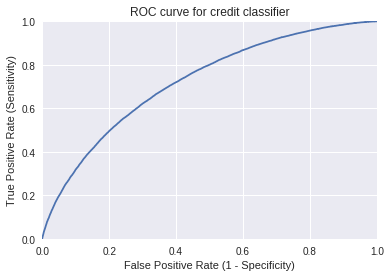

In [0]:
#plot the ROC curve
%matplotlib inline
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(validation_lbl, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for credit classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [0]:
# calculate the area under the ROC curve score
print(metrics.roc_auc_score(validation_lbl, y_pred_prob))

0.7230713570294972


## LDA
We used Linear discriminant analysis, since after the preprocessing all our data has become continuous.

The accuracy score resulted 0.77 in the validation set.

The ROC curve performance was 0.71 for the validation set.

In [0]:
lda = LinearDiscriminantAnalysis()
lda.fit(train_data, train_lbl)

lda_pred = lda.predict(validation_data)
print('Accuracy of Multivariate Gaussian Bayes using shared covariance matrix (LDA) on validation set: ', accuracy_score(validation_lbl, lda_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Multivariate Gaussian Bayes using shared covariance matrix (LDA) on validation set:  0.7728912190678044


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [0]:
y_pred_prob = lda.predict_proba(validation_data)[:, 1]

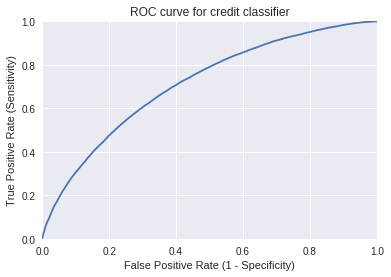

In [0]:
#plot the ROC curve
%matplotlib inline
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(validation_lbl, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for credit classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [0]:
# calculate the area under the ROC curve score
print(metrics.roc_auc_score(validation_lbl, y_pred_prob))

0.713036297005929


## Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
gaussianNB = GaussianNB()
gaussianNB.fit(train_data, train_lbl)

predicted1 = gaussianNB.predict(validation_data)
print (predicted1)

print('Accuracy of Gaussian Naive Bayes: ', accuracy_score(validation_lbl, predicted1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[-1 -1 -1 ... -1  1 -1]
Accuracy of Gaussian Naive Bayes:  0.717106363991299


In [0]:
nb_pred_prob = gaussianNB.predict_proba(validation_data)[:, 1]

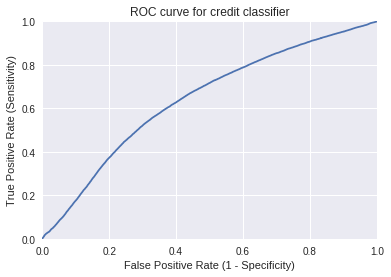

In [0]:
#plot the ROC curve
%matplotlib inline
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(validation_lbl, nb_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for credit classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [0]:
# calculate the area under the ROC curve score
print(metrics.roc_auc_score(validation_lbl, nb_pred_prob))

0.6425294772245811


## Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(min_samples_split=7, max_depth=20) #decision with chosen parameters
dtree1 = dtree1.fit(train_data, train_lbl) #train decision tree with training set

In [0]:
accuracy = dtree1.predict(validation_data)
print('Accuracy of Dtree1: ', accuracy_score(validation_lbl, accuracy))

Accuracy of Dtree1:  0.7236971758975217


In [0]:
dt_pred_prob = dtree1.predict_proba(validation_data)[:, 1]

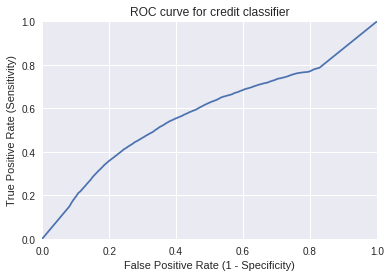

In [0]:
#plot the ROC curve
%matplotlib inline
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(validation_lbl, dt_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for credit classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [0]:
# calculate the area under the ROC curve score
print(metrics.roc_auc_score(validation_lbl, dt_pred_prob))

0.5762491534323329


## Performances of different classifiers

We tried different classifiers and they all gave different scores using **accuracy_score** function for the validation set.

Accuracy_scores of the data didn't help deciding which classifier would be more beneficial, since almost all of them were similar scores.

We tried MLP, LDA, Decision tree and naive bayes classifiers.

Among the 4 classifiers, the LDA and MLP have given the best scores when ROC curve is used as performance metrics.
MLP has a slight disadvantage of running time compared to LDA, however it gave slightly better results.

## Read test files
Here we added two options for test data. First one is if the data is in csv form, the second one is if the data is in excel file.
Then if you apply editData function, the test data will be preprocessed.

We haven't run the code after here, since we don't have test labels.

In [0]:
#If the test file is in csv format
testData = pd.read_csv('test-credit.csv') #change name if necessary
testLabel = pd.read_csv('') #insert name here

In [0]:
#If the test file is in excel format
testData = pd.read_excel('test-credit.xlsx') #change name if necessary
testLabel = pd.read_excel('') #insert name here

In [0]:
#edit test data
editData(testData)

In [0]:
MLPtest = testMLP.predict(testData) #check accuracy score of MLP
print('Accuracy of MLP: ', accuracy_score(testLabel, MLPtest))

In [0]:
test_pred_prob = testMLP.predict_proba(testData)[:, 1]

In [0]:
#plot the ROC curve
%matplotlib inline
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(testLabel, test_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for credit classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [0]:
# calculate the area under the ROC curve score
print(metrics.roc_auc_score(testLabel, test_pred_prob))

In [0]:
lda_pred = lda.predict(testData) #check accuracy of lda
print('Accuracy of LDA: ', accuracy_score(testLabel, lda_pred))

In [0]:
test_pred_prob = lda.predict_proba(testData)[:, 1]

In [0]:
#plot the ROC curve
%matplotlib inline
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(testLabel, test_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for credit classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [0]:
# calculate the area under the ROC curve score
print(metrics.roc_auc_score(testLabel, test_pred_prob))

# Summary

In this project, we have worked with a dataset to decide if the applicants are suitable to be given credit.
We have done a lot of preprocessing including adding dummy variables and normalization.

We have splitted the given data into two parts: train and validation.

We have tried various classifiers, including decision tree, gaussian Naive bayes, MLP and LDA.  From these classifiers, we have selected the 2 classifiers that gave the best performances: MLP and LDA.

Then, we plotted the ROC curve of the predictions for the validation set.

The performance of MLP was 0.72 while LDA had the performance of 0.71 for the validation set.
Which makes MLP slightly better then LDA.


* As reference for using ROC curve:
https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb
